# Uncertainty Propagation Example

In this example it is demonstrated the implementation of the method of uncertaity propagation by direct evaluation of linear models. The dataset used in this example is extracted from 1975 World Almanac and Book Facts. This example is proposed in Smith (2013).

References:

Smith, R. C. (2013). Uncertainty quantification : theory, implementation, and applications.

### Import libraries

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

### Implementation of OLS estimator to estimate coefficients of the linear model proposed

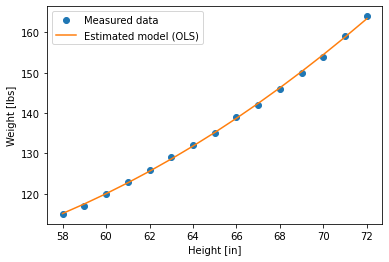

In [8]:
# Alamanc dataset
height=np.linspace(58,72,15)
weight=np.array([115, 117, 120, 123, 126, 129, 132, 135, 139, 142, 146, 150, 154,159, 164])


# Implementation of OLS estimator

# Design matrix (X)
X=[]
for i in range(len(height)):
    X.append(np.array([1 , height[i]/12, (height[i]/12)**2]))
X=np.array(X)

# Estimate of OLS
q=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),weight)

weight_est=np.dot(X,q)

# Plot data
plt.figure()
plt.plot(height,weight,'o', label='Measured data')
plt.plot(height,weight_est,label='Estimated model (OLS)')
plt.legend()
plt.xlabel('Height [in]')
plt.ylabel('Weight [lbs]')
plt.show()



### Implementation of uncertainty propgation by direct evaluation of the linear model



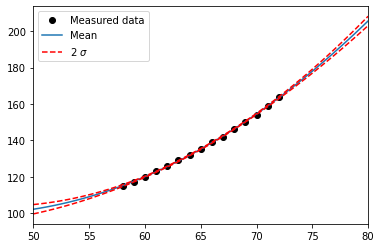

In [9]:
# Predict mean and variance
n=len(weight)
p=3

# Residual error
R=weight-weight_est
# Unbiased variance
sigma_est=(1/(n-p))*np.dot(R.T,R)
# Covariance matrix
V=sigma_est*np.linalg.inv(np.dot(X.T,X))

i=0
mu=[]
var=[]

# Interval of prediction
x_range=np.linspace(50,80,50)

for x in x_range :
    mu.append(q[0]+(x/12)*q[1]+(x/12)**2*q[2])
    var.append(V[0,0]+(x/12)**2*V[1,1]+(x/12)**4*V[2,2]+2*(x/12)*V[0,1]+2*(x/12)**2*V[0,2]+2*(x/12)**3*V[1,2])

# Plot figure
plt.figure()
plt.plot(height,weight,'ko', label='Measured data')
plt.plot(x_range,mu,label='Mean')
plt.plot(x_range,mu+2*np.sqrt(var),'r--',label='2 $\sigma$')
plt.plot(x_range,mu-2*np.sqrt(var),'r--')
plt.xlim(50,80)
plt.legend()
plt.show()